## 1. Preprocessing

In [1]:
from imp import reload
from sqlalchemy import create_engine
from src import config, data_utils, preprocessing
import pandas as pd
import seaborn as sns

C:\Users\Cesar_Maydana\AppData\Local\Temp\ipykernel_14176\1277252762.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


### Getting the data

In [2]:
app_train, app_test = data_utils.get_datasets()
app_train.columns

columns Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'duration_in_minutes', 'pickup_year', 'pickup_day',
       'pickup_day_of_week', 'pickup_minute', 'trips_per_hour',
       'average_speed_per_hour'],
      dtype='object')


Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'duration_in_minutes', 'pickup_year', 'pickup_day',
       'pickup_day_of_week', 'pickup_minute', 'trips_per_hour',
       'average_speed_per_hour'],
      dtype='object')

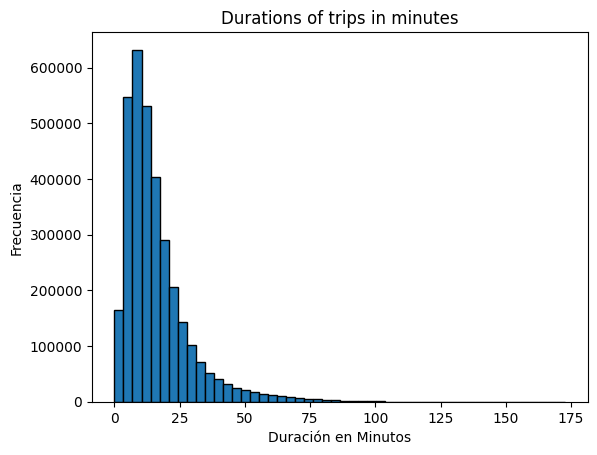

In [6]:
import matplotlib.pyplot as plt

# Suponiendo que duration_in_minutes es tu lista de duraciones

plt.hist(app_train.duration_in_minutes, bins=50, edgecolor='black')
plt.title('Durations of trips in minutes')
plt.xlabel('Duración en Minutos')
plt.ylabel('Frecuencia')
plt.show()

In [9]:
app_train.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'duration_in_minutes', 'pickup_year', 'pickup_day',
       'pickup_day_of_week', 'pickup_minute', 'trips_per_hour',
       'average_speed_per_hour'],
      dtype='object')

In [10]:
columns_to_drop = ['fare_amount', 'tolls_amount','airport_fee','tip_amount', 'extra', 'mta_tax','improvement_surcharge','congestion_surcharge']
app_train = app_train.drop(columns=columns_to_drop)
app_test = app_test.drop(columns=columns_to_drop)

In [11]:
# Seleccionar columnas de tipo objeto
columnas_objeto = app_train.select_dtypes(include=['object'])
columnas_objeto.head()

,VendorID,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type
0,1,1.0,N,246.0,151,2
1,1,1.0,N,238.0,74,2
2,1,1.0,N,163.0,260,2
3,1,1.0,N,79.0,182,1
4,1,1.0,N,238.0,75,1


In [12]:
columns_to_drop = ['VendorID', 'RatecodeID','store_and_fwd_flag']
app_train = app_train.drop(columns=columns_to_drop)
app_test = app_test.drop(columns=columns_to_drop)

In [13]:
app_train.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount,duration_in_minutes,pickup_year,pickup_day,pickup_day_of_week,pickup_minute,trips_per_hour,average_speed_per_hour
0,1.0,4.1,246.0,151,2,20.80,18.700000,2022.0,1,6,0,101898,25.577794
1,1.0,2.3,238.0,74,2,14.80,13.816667,2022.0,1,6,27,101898,25.577794
2,1.0,4.2,163.0,260,2,19.30,15.366667,2022.0,1,6,59,101898,25.577794
3,1.0,0.0,79.0,182,1,42.00,39.733333,2022.0,1,6,48,101898,25.577794
4,1.0,1.6,238.0,75,1,13.55,9.383333,2022.0,1,6,28,101898,25.577794


In [14]:
app_train.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'duration_in_minutes', 'pickup_year',
       'pickup_day', 'pickup_day_of_week', 'pickup_minute', 'trips_per_hour',
       'average_speed_per_hour'],
      dtype='object')

In [8]:
'''import json

# Asumiendo que 'app_train' es tu DataFrame
valores_unicos_trips_per_hour = app_train.groupby('pickup_hour')['trips_per_hour'].unique().apply(list).to_dict()
valores_unicos_average_speed_per_hour = app_train.groupby('pickup_hour')['average_speed_per_hour'].unique().apply(list).to_dict()

# Convierte los int64 a int estándar de Python y redondea a dos decimales
valores_unicos_trips_per_hour = {k: [round(float(i), 2) for i in v] for k, v in valores_unicos_trips_per_hour.items()}
valores_unicos_average_speed_per_hour = {k: [round(float(i), 2) for i in v] for k, v in valores_unicos_average_speed_per_hour.items()}

with open('valores_unicos_trips_per_hour.json', 'w') as f:
    json.dump(valores_unicos_trips_per_hour, f)
with open('valores_unicos_average_speed_per_hour.json', 'w') as f:
    json.dump(valores_unicos_average_speed_per_hour, f)'''

In [5]:
# Crear el motor de la base de datos
# Aquí estoy asumiendo que estás usando SQLite y que quieres guardar los datos en un archivo llamado `mydatabase.db`
#engine = create_engine(rf"sqlite:///{config.SQLITE_BD_ABSOLUTE_PATH}", echo=False)

# Guardar los DataFrames en la base de datos
#app_train.to_sql('app_train', engine, if_exists='replace', index=False)
#app_test.to_sql('app_test', engine, if_exists='replace', index=False)

## Split targets from dataset

In [15]:
(
 X_train,
 y_train_total_amount,
 y_train_duration_in_minutes,
 X_test,
 y_test_total_amount,
 y_test_duration_in_minutes
) = data_utils.get_feature_target(app_train, app_test)

## Stract validation dataset

In [16]:
(
X_train,
X_val,
y_train_total_amount,
y_val_total_amount,
y_train_duration_in_minutes,
y_val_duration_in_minutes
) = data_utils.get_train_val_sets(X_train, y_train_total_amount, y_train_duration_in_minutes)

In [17]:
print(X_train.shape, X_val.shape, X_test.shape)

(2677701, 11) (669426, 11) (3280445, 11)


## Clear and encode datasets

In [18]:
null_values = X_test.isnull().sum()
print(null_values)

passenger_count           0
trip_distance             0
PULocationID              0
DOLocationID              0
payment_type              0
pickup_year               0
pickup_day                0
pickup_day_of_week        0
pickup_minute             0
trips_per_hour            0
average_speed_per_hour    0
dtype: int64


In [19]:
X_train, X_val, X_test = preprocessing.preprocess_data(X_train, X_val, X_test)

Input train data shape:  (2677701, 11)
Input val data shape:  (669426, 11)
Input test data shape:  (3280445, 11) 



c:\Anyone\repos\Anyone-AI-Sprint-3\env\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Anyone\repos\Anyone-AI-Sprint-3\env\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Model

### Cost

In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor
import xgboost as xgb
import pickle


# LightGBM Regressor (using validation set)
lgbm = LGBMRegressor(random_state=42)

# Train on training features and duration target
lgbm.fit(X_train, y_train_total_amount)

# Make predictions on validation set features
y_pred_lgbm_val = lgbm.predict(X_val)

# Evaluate on validation set - duration
r2_lgbm_val = r2_score(y_val_total_amount, y_pred_lgbm_val)
mse_lgbm_val = mean_squared_error(y_val_total_amount, y_pred_lgbm_val)

# Print validation set results (f-string for readability)
print(f"LightGBM Regressor (Validation) - R2: {r2_lgbm_val:.4f}, MSE: {mse_lgbm_val:.4f}")

# Make predictions on TEST set features
y_pred_lgbm_test = lgbm.predict(X_test)

# Evaluate on TEST set - duration
r2_lgbm_test = r2_score(y_test_total_amount, y_pred_lgbm_test)
mse_lgbm_test = mean_squared_error(y_test_total_amount, y_pred_lgbm_test)

# Print TEST set results (f-string for readability)
print(f"LightGBM Regressor (Test) - R2: {r2_lgbm_test:.4f}, MSE: {mse_lgbm_test:.4f}")


# XGBoost Regressor (using validation set)
xgbr = xgb.XGBRegressor(random_state=42)

# Train on training features and duration target
xgbr.fit(X_train, y_train_duration_in_minutes)

# Make predictions on validation set features
y_pred_xgbr_val = xgbr.predict(X_val)

# Evaluate on validation set - duration
r2_xgbr_val = r2_score(y_val_total_amount, y_pred_xgbr_val)
mse_xgbr_val = mean_squared_error(y_val_total_amount, y_pred_xgbr_val)

# Print validation set results (f-string for readability)
print(f"XGBoost Regressor (Validation) - R2: {r2_xgbr_val:.4f}, MSE: {mse_lgbm_val:.4f}")

# Make predictions on TEST set features
y_pred_xgbr_test = xgbr.predict(X_test)

# Evaluate on TEST set - duration
r2_xgbr_test = r2_score(y_test_total_amount, y_pred_xgbr_test)
mse_xgbr_test = mean_squared_error(y_test_total_amount, y_pred_xgbr_test)

with open('time_model1.pkl', 'wb') as file:
  pickle.dump(xgbr, file)

with open('Rate.pkl', 'wb') as file:
  pickle.dump(lgbm, file)


# Print TEST set results (f-string for readability)
print(f"XGBoost Regressor (Test) - R2: {r2_xgbr_test:.4f}, MSE: {mse_xgbr_test:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.114816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1318
[LightGBM] [Info] Number of data points in the train set: 2677701, number of used features: 460
[LightGBM] [Info] Start training from score 21.004335
LightGBM Regressor (Validation) - R2: 0.9340, MSE: 14.8894
LightGBM Regressor (Test) - R2: 0.8600, MSE: 29.3862
XGBoost Regressor (Validation) - R2: 0.6591, MSE: 14.8894
XGBoost Regressor (Test) - R2: 0.5478, MSE: 94.9106


### Time

In [22]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import pickle


# LightGBM Regressor (using validation set)
lgbm = LGBMRegressor(random_state=42)

# Train on training features and duration target
lgbm.fit(X_train, y_train_duration_in_minutes)

# Make predictions on validation set features
y_pred_lgbm = lgbm.predict(X_val)

# Evaluate on validation set - duration
r2_lgbm_val = r2_score(y_val_duration_in_minutes, y_pred_lgbm)
mse_lgbm_val = mean_squared_error(y_val_duration_in_minutes, y_pred_lgbm)

# Print validation set results (f-string for readability)
print(f"LightGBM Regressor (Validation) - R2: {r2_lgbm_val:.4f}, MSE: {mse_lgbm_val:.4f}")

# XGBoost Regressor (using validation set)
xgbr = XGBRegressor(random_state=42)

# Train on training features and duration target
xgbr.fit(X_train, y_train_duration_in_minutes)

# Make predictions on validation set features
y_pred_xgbr = xgbr.predict(X_val)

# Evaluate on validation set - duration
r2_xgbr_val = r2_score(y_val_duration_in_minutes, y_pred_xgbr)
mse_xgbr_val = mean_squared_error(y_val_duration_in_minutes, y_pred_xgbr)

with open('time_model1.pkl', 'wb') as file:
  pickle.dump(xgbr, file)

with open('Rate.pkl', 'wb') as file:
  pickle.dump(lgbm, file)


# Print validation set results (f-string for readability)
print(f"XGBoost Regressor (Validation) - R2: {r2_xgbr_val:.4f}, MSE: {mse_xgbr_val:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1318
[LightGBM] [Info] Number of data points in the train set: 2677701, number of used features: 460
[LightGBM] [Info] Start training from score 15.911233
LightGBM Regressor (Validation) - R2: 0.8477, MSE: 25.0889
XGBoost Regressor (Validation) - R2: 0.8558, MSE: 23.7678
